In [106]:
# !pip install pandas

In [107]:
# !pip install numpy

In [108]:
# !pip install finance-datareader

In [109]:
# !pip install yfinance

In [110]:
from datetime import datetime, timedelta
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
def getData(code, dateStart, dateEnd) :
    df = fdr.DataReader(code, dateStart, dateEnd)
    return df
myCode = '011200'    # HMM 종목 코드
date_end = datetime.today().date()
date_start = date_end - timedelta(days=365)
df = getData(myCode, date_start, date_end)
df = fdr.DataReader('011200', '2021')
df.index = df.index.strftime("%Y-%m-%d")

In [112]:
df_close = df['Close']
df_close

Date
2021-01-04    16550
2021-01-05    16500
2021-01-06    15850
2021-01-07    16150
2021-01-08    15750
              ...  
2025-12-10    20150
2025-12-11    20400
2025-12-12    20750
2025-12-15    20700
2025-12-16    20800
Name: Close, Length: 1216, dtype: int64

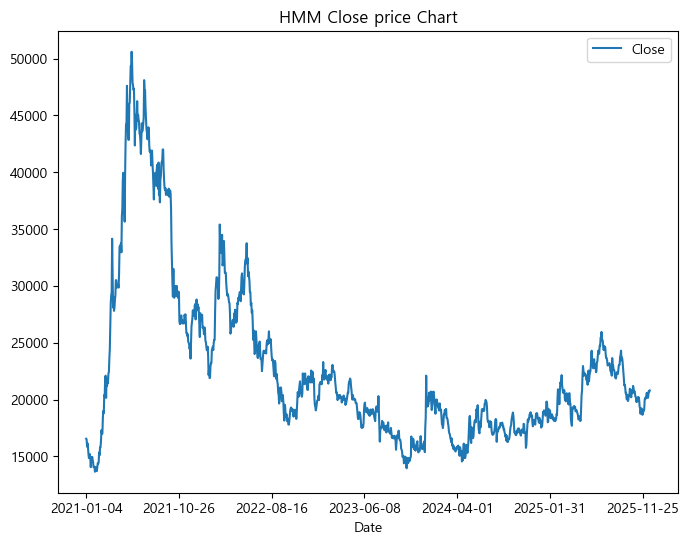

In [113]:
# 시간에 따른 주식종가-거래량 비교 차트
plt.figure(figsize = (8,6))

df['Close'].plot();
plt.title('HMM Close price Chart')
plt.legend()
plt.show()

In [114]:
df.sort_values('Volume', ascending = False).head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-12-20,18440,23300,18000,22100,56598976,0.199132
2022-03-04,31350,37650,31050,35400,54417778,0.141935
2021-03-26,29600,35700,29600,34150,54130619,0.159593
2021-03-29,32600,33550,29700,30950,41757002,-0.093704
2021-01-04,14900,16750,14250,16550,38614102,0.186380
2021-05-27,49100,50600,47550,50600,33509359,0.024291
2021-03-09,22000,24050,19950,20150,32684736,-0.088235
2021-06-08,41750,46600,40400,45050,28909021,0.063754
2021-05-13,47800,50000,43200,44450,28785777,-0.066176


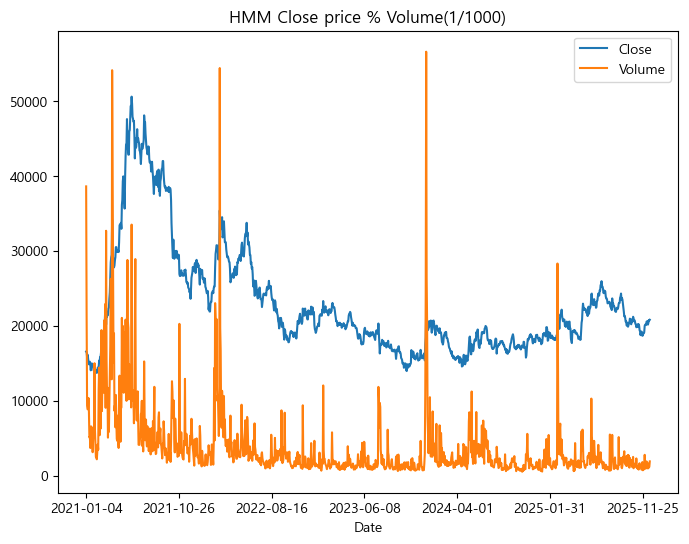

In [115]:
# 시간에 따른 주식종가-거래량 비교 차트
plt.figure(figsize = (8,6))
df['Close'].plot();
(df['Volume']/1000).plot()    # 거래량
plt.title('HMM Close price % Volume(1/1000)')
plt.legend()
plt.show()

In [116]:
hmm_volume = df[np.sqrt(df['Volume']) >= 5000]
hmm_volume

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,14900,16750,14250,16550,38614102,0.186380
2021-03-09,22000,24050,19950,20150,32684736,-0.088235
2021-03-23,27350,29600,27000,28450,26263232,0.071563
2021-03-26,29600,35700,29600,34150,54130619,0.159593
2021-03-29,32600,33550,29700,30950,41757002,-0.093704
2021-03-30,30000,30200,28000,28100,26785243,-0.092084
2021-05-13,47800,50000,43200,44450,28785777,-0.066176
2021-05-27,49100,50600,47550,50600,33509359,0.024291
2021-06-08,41750,46600,40400,45050,28909021,0.063754


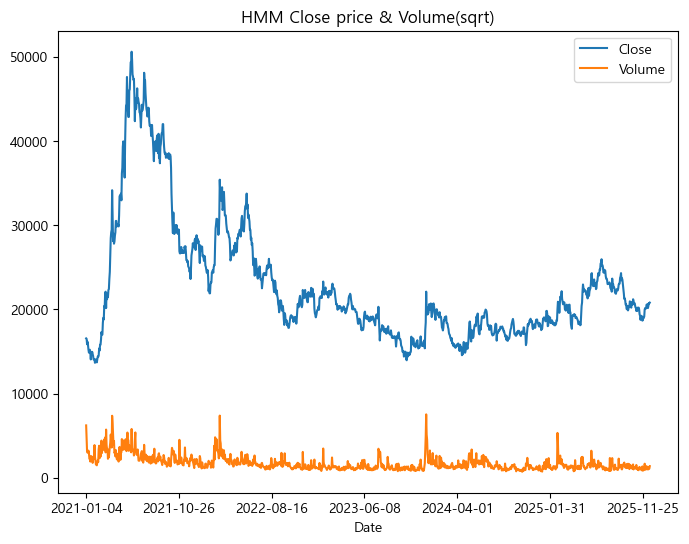

In [117]:
# 시간에 따른 주식종가-거래량 비교 차트
plt.figure(figsize = (8,6))


df['Close'].plot();
np.sqrt(df['Volume']).plot()    # 거래량

plt.title('HMM Close price & Volume(sqrt)')
plt.legend()
plt.show()

In [118]:
scfi = pd.read_csv('data/SCFI_data.csv')
column = ['index']
scfi_df = pd.DataFrame(list(scfi['index']), index=list(scfi['date']))
scfi_df.index.name = 'date'
scfi_df

,0
date,
2021-01-08,2870
2021-01-15,2885
2021-01-22,2869
2021-01-29,2862
2021-02-05,2885
...,...
2025-10-24,1403
2025-10-31,1551
2025-11-07,1495


2021-01-08    2870
2021-01-15    2885
2021-01-22    2869
2021-01-29    2862
2021-02-05    2885
              ... 
2025-10-24    1403
2025-10-31    1551
2025-11-07    1495
2025-11-14    1451
2025-11-21    1394
Length: 246, dtype: int64


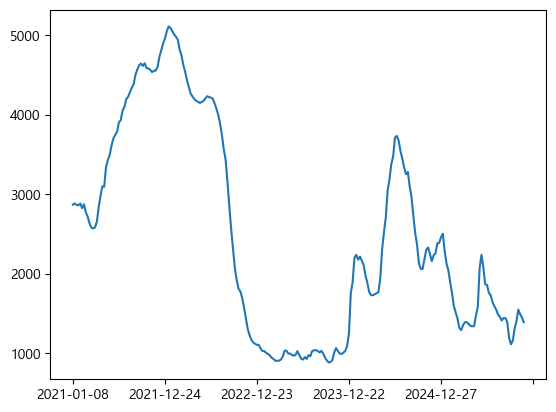

In [119]:
scfi_series = pd.Series(list(scfi['index']), index=list(scfi['date']))
scfi_series.rename = 'date'
print(scfi_series)
scfi_series.plot();

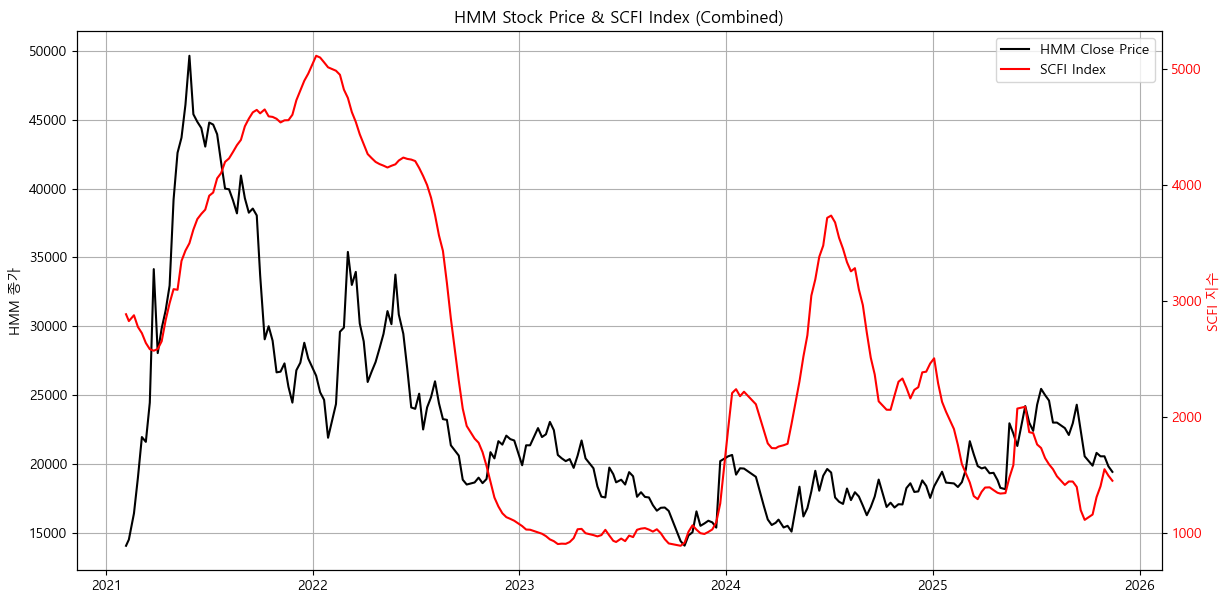

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import FinanceDataReader as fdr
# HMM
df_hmm = fdr.DataReader('011200', '2021-01-31', '2025-11-20')
df_hmm = df_hmm.reset_index()  # Date 컬럼 생성

# SCFI
df_scfi = pd.read_csv("data/SCFI_21_25.csv", encoding="utf-8-sig")
df_scfi = df_scfi.drop(columns=["단위 :  달러($)"], errors="ignore")
df_scfi["등록일"] = pd.to_datetime(df_scfi["등록일"])
merged = pd.merge(
    df_hmm,
    df_scfi,
    left_on="Date",
    right_on="등록일",
    how="inner"
)
# 그래프
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
ax1.plot(merged["Date"], merged["Close"], color='black', label='HMM Close Price')
ax1.set_ylabel("HMM 종가", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(merged["Date"], merged["운임지수"], color='red', label='SCFI Index')
ax2.set_ylabel("SCFI 지수", color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title("HMM Stock Price & SCFI Index (Combined)")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")
plt.show()

In [121]:
corr_HMM_SCFI = merged["Close"].corr(merged["운임지수"])
print("HMM Stock Price & SCFI 상관계수 :", np.around(corr_HMM_SCFI, 3))  # 소수점 세 번째 자리에서 반올림

HMM Stock Price & SCFI 상관계수 : 0.638


C:\Users\Jay\AppData\Local\Temp\ipykernel_10760\516483275.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  wti = yf.download("WTI", start="2021-01-01", end="2025-11-22")
[*********************100%***********************]  1 of 1 completed


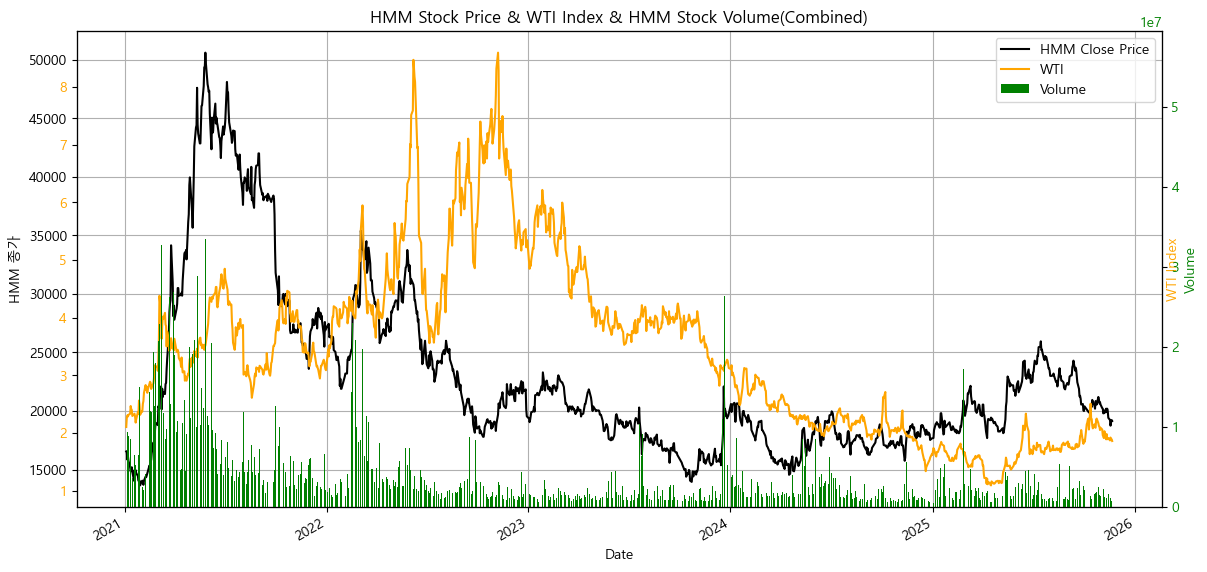

In [122]:
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# ---- 1. 데이터 수집 -----------
# 벙커유 대체 : WTI 원유 ETF(USD)
wti = yf.download("WTI", start="2021-01-01", end="2025-11-22")

# HMM 주가
hmm = fdr.DataReader('011200', '2021-01-01', '2025-11-22')

# 거래량 데이터
df_volume = pd.DataFrame(df['Volume'])
df_volume = df_volume.loc['2021-01-01':'2025-11-22',:]


# ---- 2. 차트 그리기 ----------
plt.figure(figsize=(14,7))

# 첫 번째 축: HMM
ax1 = plt.gca()
ax1.plot(hmm.index, hmm['Close'], color='black', label='HMM Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("HMM 종가", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# 두 번째 축:
ax2 = ax1.twinx()
ax2.plot(wti.index, wti['Close'], color='orange', label='WTI')
ax2.set_ylabel("WTI Index", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 세 번째 축:
ax3 = ax2.twinx()
ax3.bar(hmm.index, hmm['Volume'], color='green', label='Volume')
ax3.set_ylabel("Volume", color='green')
ax3.tick_params(axis='y', labelcolor='green')

# 제목 & 범례
plt.title("HMM Stock Price & WTI Index & HMM Stock Volume(Combined)")
fig = plt.gcf()
fig.autofmt_xdate()

# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
plt.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc="upper right")

plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_10760\2953087973.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  wti = yf.download("WTI", start="2021-01-01", end="2025-11-22")
[*********************100%***********************]  1 of 1 completed


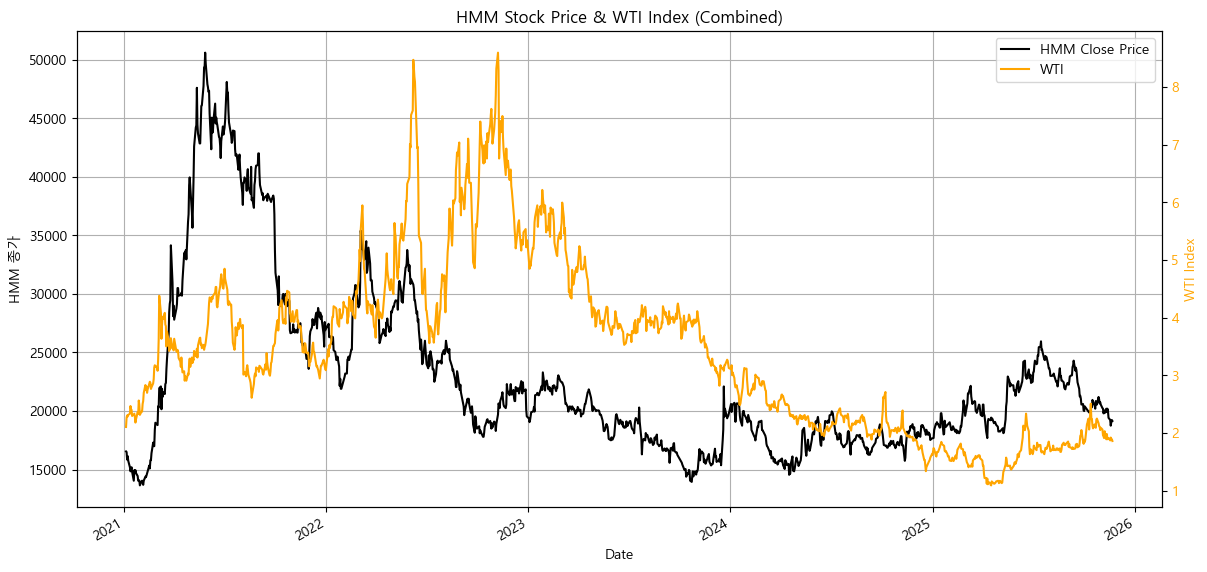

In [123]:
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# ---- 1. 데이터 수집 -----------
# 벙커유 대체 : WTI 원유 ETF(USD)
wti = yf.download("WTI", start="2021-01-01", end="2025-11-22")

# HMM 주가
hmm = fdr.DataReader('011200', '2021-01-01', '2025-11-22')


# ---- 2. 차트 그리기 ----------
plt.figure(figsize=(14,7))

# 첫 번째 축: HMM
ax1 = plt.gca()
ax1.plot(hmm.index, hmm['Close'], color='black', label='HMM Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("HMM 종가", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# 두 번째 축:
ax2 = ax1.twinx()
ax2.plot(wti.index, wti['Close'], color='orange', label='WTI')
ax2.set_ylabel("WTI Index", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 & 범례
plt.title("HMM Stock Price & WTI Index (Combined)")
fig = plt.gcf()
fig.autofmt_xdate()

# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.show()

In [124]:
hmm = pd.DataFrame(hmm['Close'])
HMM_WTI = pd.concat([hmm, wti['Close']], axis=1)

In [125]:
corr_HMM_WTI = HMM_WTI['Close'].corr(HMM_WTI['WTI'])
print("HMM Stock Price & WTI 상관계수:", np.around(corr_HMM_WTI,3))

HMM Stock Price & WTI 상관계수: 0.216
